# Assignment topic
Developing a machine learning model to reduce the immunogenicity of an antibody-based drug.

The problem that you will be solving is one of ‘humanization’. When we develop antibody
therapeutics, we typically immunize animals (mostly mice) to produce antibodies. Such
murine antibodies would elicit an immune response in humans, so they need to be mutated
to look as ‘human’ as possible.
In 2019, scientists at Visterra created a bi-LSTM based model that learned the features of
murine, human antibody sequences. They used a (small) portion of our database of human
and mouse sequences to create a separate model for each organism (see repo below,
especially the associated notebook that provides a walkthrough).
https://github.com/vkola-lab/peds2019
Such models are useful first approximations for humanization as after introducing some
mutations to the framework (so as not to destroy binding mediated by CDRs) you can gauge
whether your new sequence looks ‘more human’.
The peds2019 model however was not trained to discriminate between the different
antibody sequences, e.g. mouse vs human. Such a model appears crucial to obtain any kind
of correlation with the experimentally observed immunogenicity values for therapeutic
antibodies (here).<BR>
__Your task therefore is to create a model that produces a score that indicates whether a
given antibody sequence appears more human or mouse__. <BR>
You can adapt the peds2019
model to simplify the task, but if you think some other architecture would be better, go
ahead. You can use just the sequence data from the peds2019 repo for the purpose of this
task (variable length, vlen), though if you feel strong enough nothing stops you from using
more of our data (__antibodymap.org__). <BR>Your model should receive an antibody sequence on - input and produce a score that indicates whether a sequence is more human than our mouse.
You should be able to communicate your results via a notebook similar to this in peds2019
repo: https://github.com/vkola-lab/peds2019/blob/master/tutorial.ipynb


# Basic docs

Some reading for this task:
- Basics of antibody structure, function and a bit on ‘humanization’ (here) to give you => https://academic.oup.com/bib/article/21/5/1549/5581643
an idea of the data we deal with and problems we solve.
- bi-LSTM model of antibody sequences that you might be using as a basis for this task => https://academic.oup.com/peds/article/32/7/347/5554642
(here).

# glosary

__Immunogenicity__ => the ability of a foreign substance, such as an antigen, to provoke an immune response in the body of a human or other animal.  <BR>
__murine antibodies__ => Murine: A murine antibody is one of which both chain types are of mouse origin. A murine antibody is identified by the pre-stem -o- in its  <BR>
__binding mediated by CDRs__ =>  Complementarity-determining region (CDR) sequences are variable antibody (Ab) sequences that respond with specificity, duration and strength to identify and bind to antigen (Ag) epitopes  <BR>
__paratope__ => antigen-binding site  <BR>
__immunogenicity values__ => ??  <BR>
__Monoclonal antibody__ => ?? <BR>

chimerization => involves the combining of a murine variable domain with human constant region domains,   <BR>
__humanization__ => involves grafting the murine CDR sequences into a human scaffol  <BR>

high homology to the original sequence of interest are chosen as a scaffold (8). Some murine residues in framework regions, referred to as __vernier zone residues__, affect the conformation of __CDR loops__ and may therefore be __retained__ to preserve antibody affinit   <BR>
... <BR>
the score can correspond to the sequence identity of the closest germline sequence or the average among a set of sequences (11). Recent models take account of both preferences of particular residues and pair correlations between amino acids (12). A
__Multivariate Gaussian__ model (MG) utilized a statistical inference approach (13) and could distinguish human from
murine sequences accurately, but the score demonstrated only
a __weak negative__ correlation to experimental immunogenicity
level <BR><BR>
    __Hu-mAb__ => __random forest models__, we have constructed classifiers that accurately distinguish between each human V gene
and non-human variable domain sequences. The ‘humanness’ scores produced by these classifiers exhibited a negative
relationship with observed immunogenicity levels https://opig.stats.ox.ac.uk/webapps/humab  <BR>
OAS IgG dataset<BR>
for each V gene as __PCA demonstrated trivial clustering__ <BR>
__Youden’s J statistic__ (YJS; see Methods) <BR>

# Peds 2019 data check

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('./data/sample/human_test_vlen.txt',header=None, encoding='utf-8',names=['seq'])
test.loc[:,'data_type']='test'
val = pd.read_csv('./data/sample/human_val_vlen.txt',header=None, encoding='utf-8',names=['seq'])
val.loc[:,'data_type']='val'
train = pd.read_csv('./data/sample/human_train_vlen.txt',header=None, encoding='utf-8',names=['seq'])
train.loc[:,'data_type']='train'

data=pd.concat([test,val,train])
data['seq_len'] = data.seq.str.len()
len(data), len(val), len(test), len(train)

(510101, 76515, 76515, 357071)

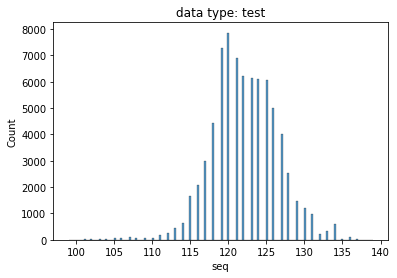

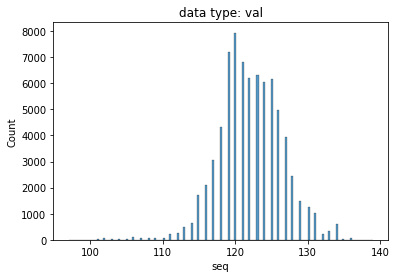

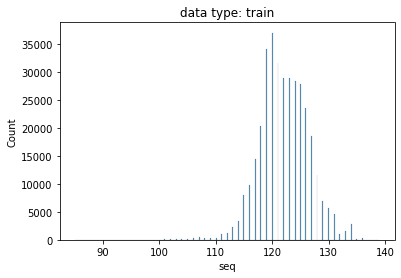

,test,val,train
count,76515.000000,76515.000000,357071.000000
mean,122.152415,122.136901,122.124107
std,4.345305,4.348721,4.359591
min,99.000000,97.000000,85.000000
25%,119.000000,119.000000,119.000000
50%,122.000000,122.000000,122.000000
75%,125.000000,125.000000,125.000000
max,139.000000,139.000000,139.000000


In [40]:
stats={}
for data_type in data['data_type'].unique():
    selected = data[data.data_type == data_type]
    g = sns.histplot(selected.seq.str.len())
    g.set_title(f'data type: {data_type}')
    stats[data_type]=selected.seq_len.describe()
    plt.show()
pd.DataFrame(stats)

*insights*
- datasets are comparable in terms of sequence:size, variance, distribution 
- train set contains shorter sequences than test/val 

In [41]:
mouse = pd.read_csv('./data/sample/mouse_test_vlen.txt',header=None, encoding='utf-8',names=['seq'])
mouse['seq_len']=mouse.seq.str.len()

count    500000.000000
mean        119.445514
std           3.015337
min          88.000000
25%         118.000000
50%         120.000000
75%         121.000000
max         137.000000
Name: seq_len, dtype: float64

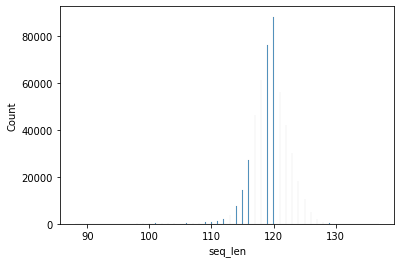

In [42]:
sns.histplot(mouse.seq_len)
mouse.seq_len.describe()

*insights*
- there is less variabillity in the mouse seq len
- human and mouse datasets looks comperable from perspective of seq len